In [41]:
run run_residuals -vx -i FE_H -u -0.4 -d -0.5 -s red_clump -c False 


Initialization runtime 4.49 s
Number of stars 846

Maximum SNR before correction 200.00
SNR correction runtime 0.14 s
Maximum SNR before correction 200.00

Nonzero Minimum SNR before mask 50.0001
SNR cut runtime 0.00 s
Minimum SNR after mask 50.0001

Bitmask application runtime 0.00 s

Pixel residuals runtime 2.07 s
Maximum residual 0.217873524319 

Finding random sigma runtime 2.01 s



In [44]:
from residuals import readElementWindow
elemwindows,window_all,window_peak,windowPeaks,windowPixels,tophats = readElementWindow('windowinfo.pkl')

In [107]:
a = np.zeros(50)
all(a)

False

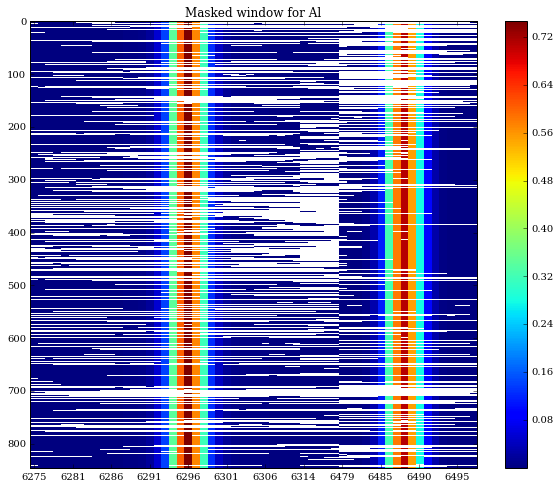

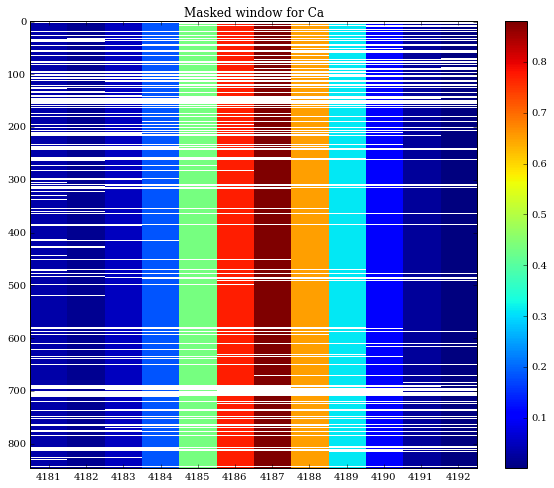

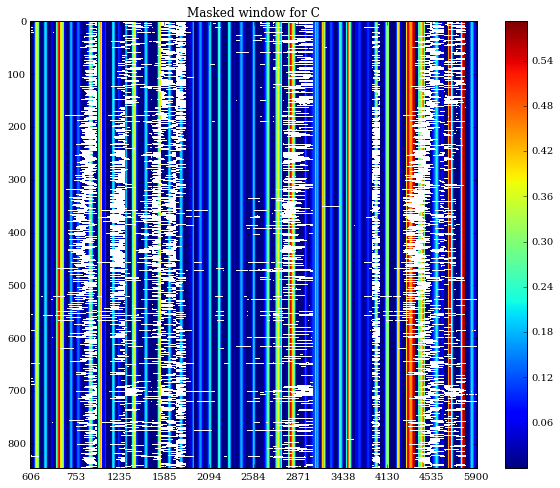

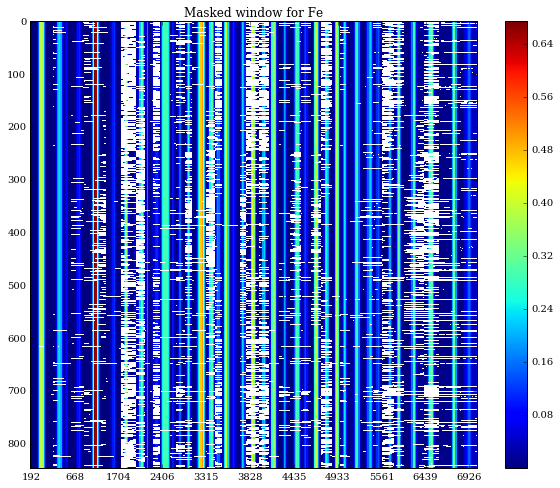

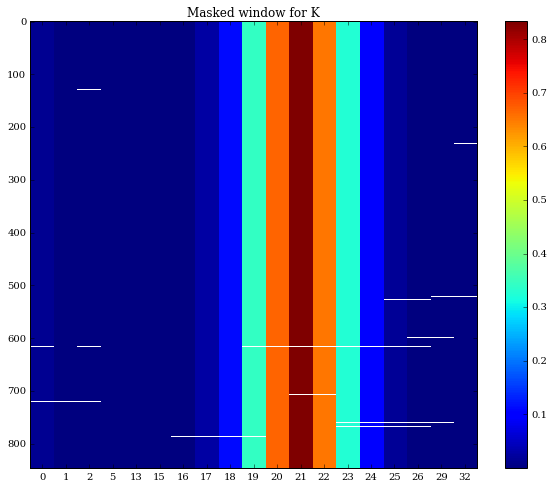

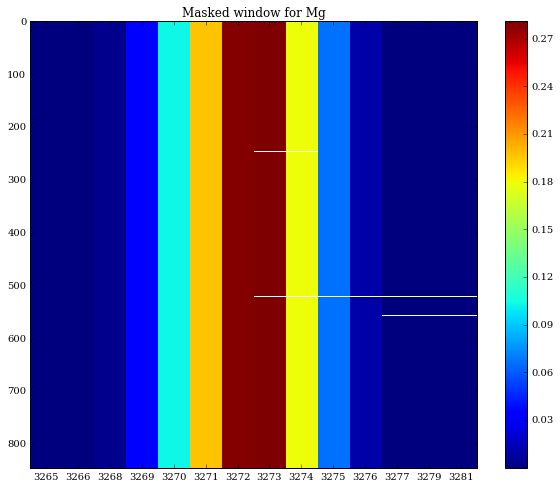

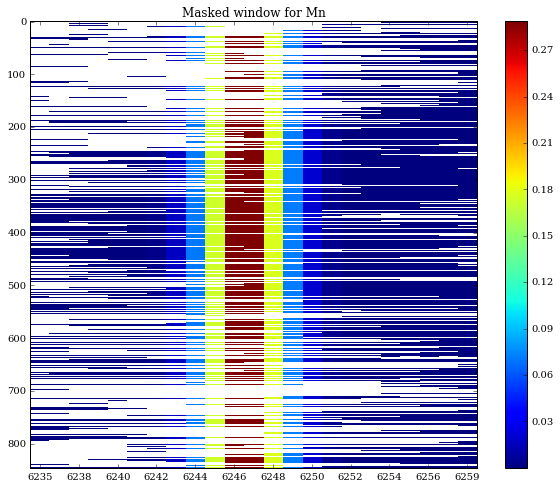

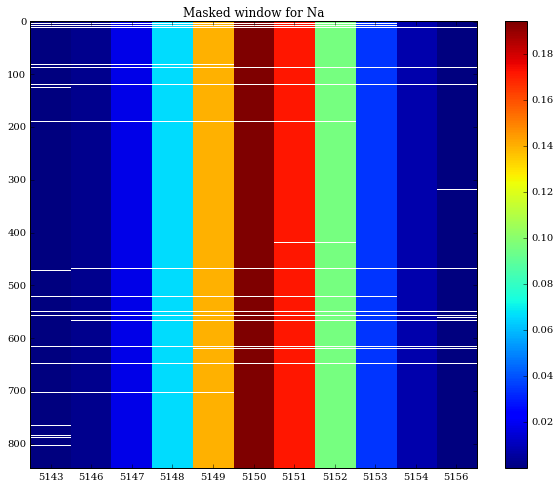

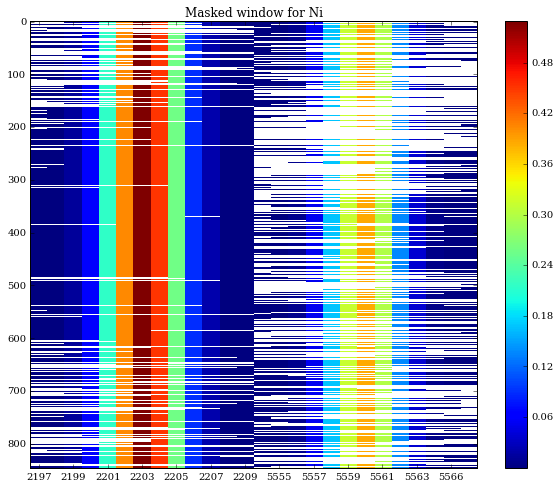

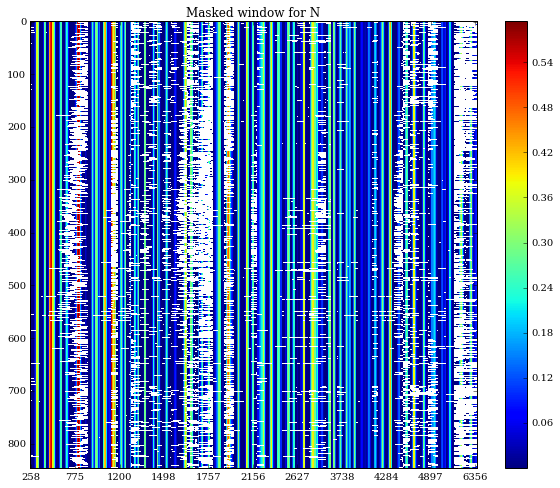

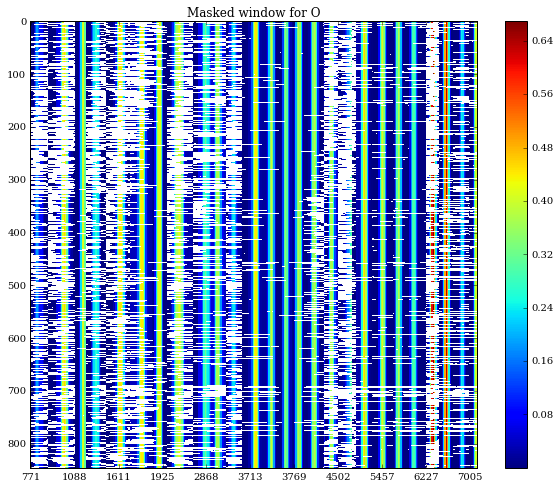

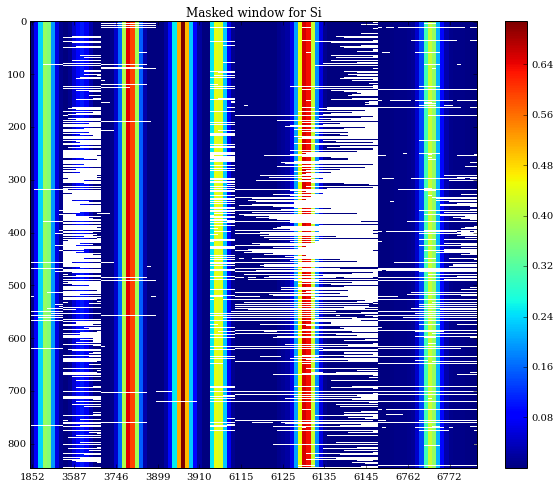

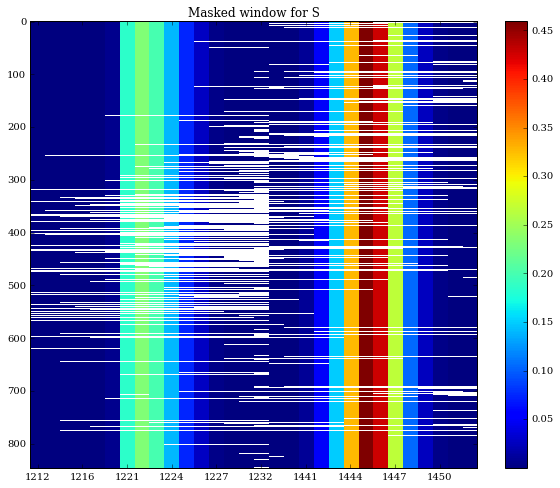

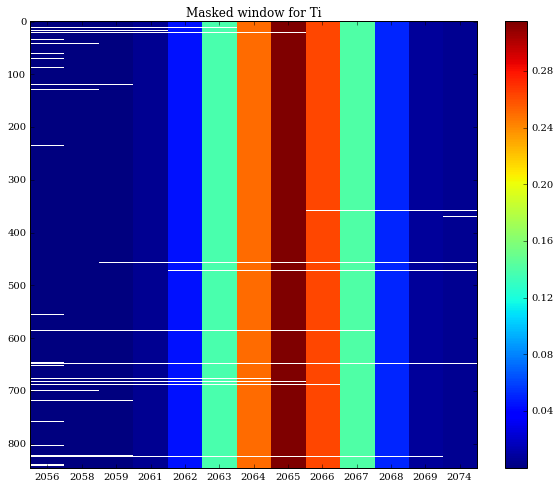

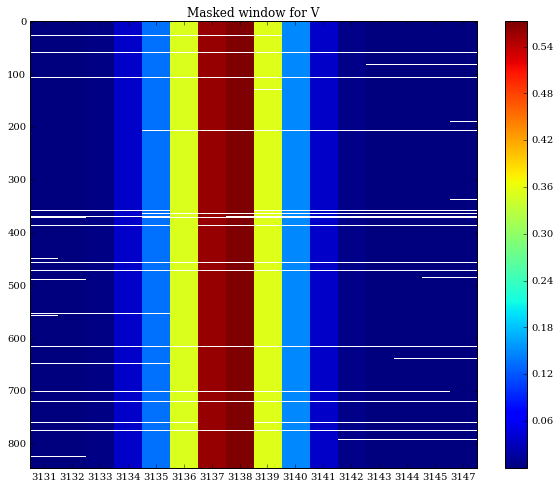

In [97]:
for elem in elems:
    w = elemwindows[elem]
    elemregions = np.tile(w,(model.numstars,1))
    shapeinds = np.where(elemregions != 0)
    elemregions[model.mask!=0] = np.nan
    hidewindow = np.unique(np.where(elemregions==0)[1])
    window = [i for i in range(aspcappix) if i not in hidewindow]
    elemregions = elemregions.T[window].T
    plt.figure(figsize=(10,8))
    plt.imshow(elemregions,aspect = float(elemregions.shape[1])/model.numstars,interpolation='nearest')
    plt.title('Masked window for {0}'.format(elem))
    splitval = len(window)/10
    plt.xticks(range(elemregions.shape[1])[::splitval],window[::splitval])
    plt.colorbar()
    plt.savefig('temp{0}.png'.format(elem))

weighteds is zero for elem  C  at  (array([], dtype=int64),)
weighteds is zero for elem  Fe  at  (array([], dtype=int64),)
weighteds is zero for elem  K  at  (array([], dtype=int64),)
weighteds is zero for elem  Mg  at  (array([  5, 827]),)
weighteds is zero for elem  Ni  at  (array([], dtype=int64),)
weighteds is zero for elem  N  at  (array([], dtype=int64),)
weighteds is zero for elem  O  at  (array([], dtype=int64),)
weighteds is zero for elem  Si  at  (array([], dtype=int64),)
weighteds is zero for elem  S  at  (array([], dtype=int64),)
var, Vnoise  7.91109732188e-05 6.00855053179e-05
var, Vnoise  1.31102021027e-05 3.50307965954e-05


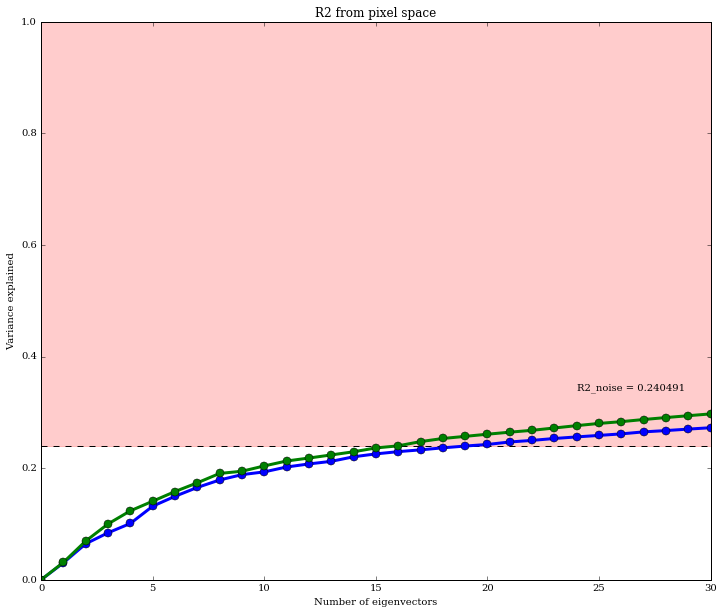

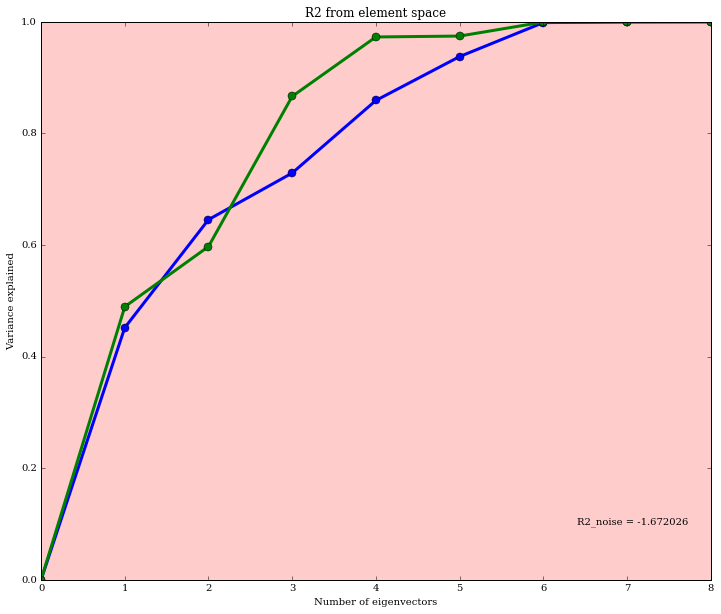

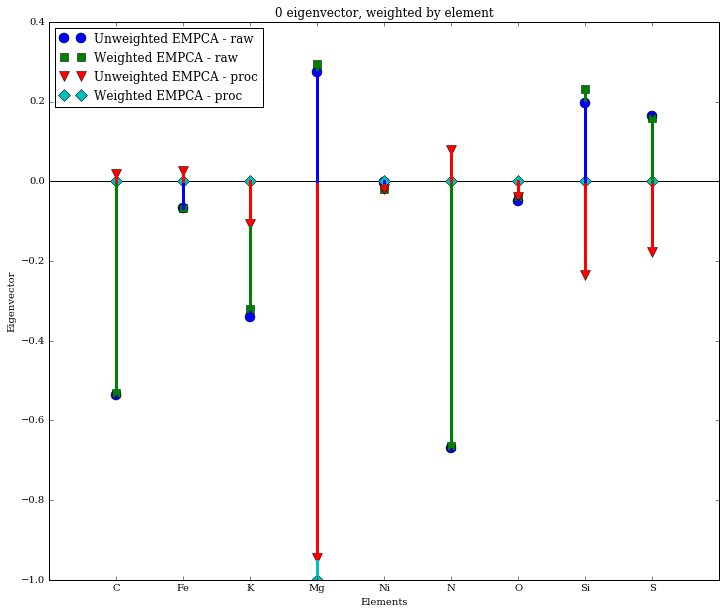

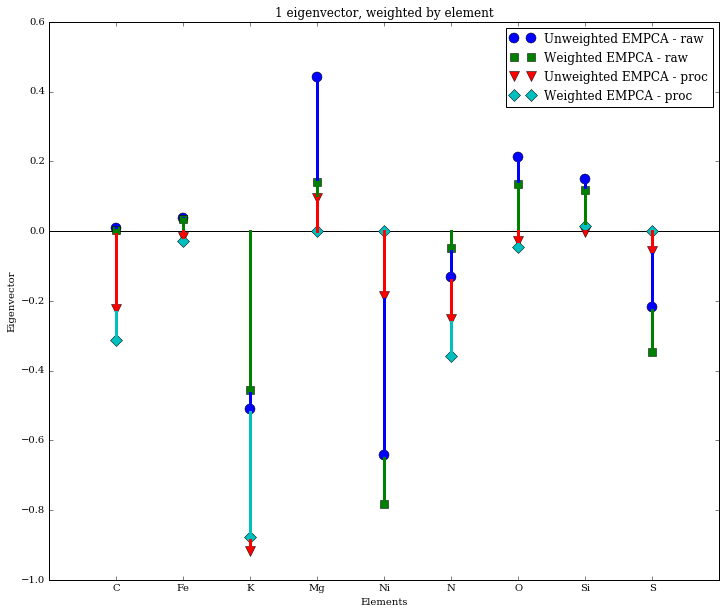

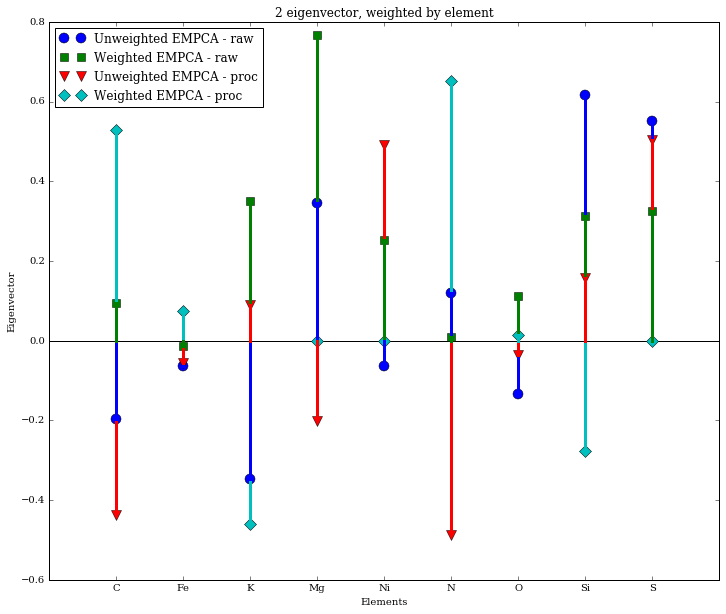

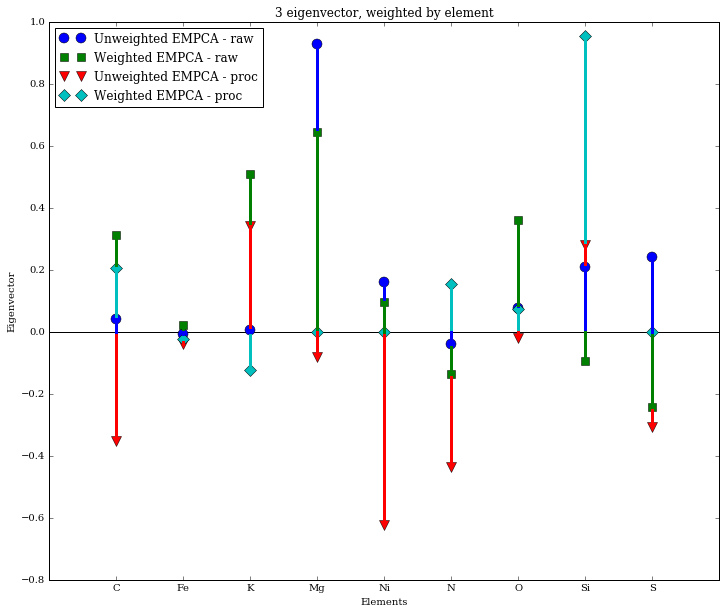

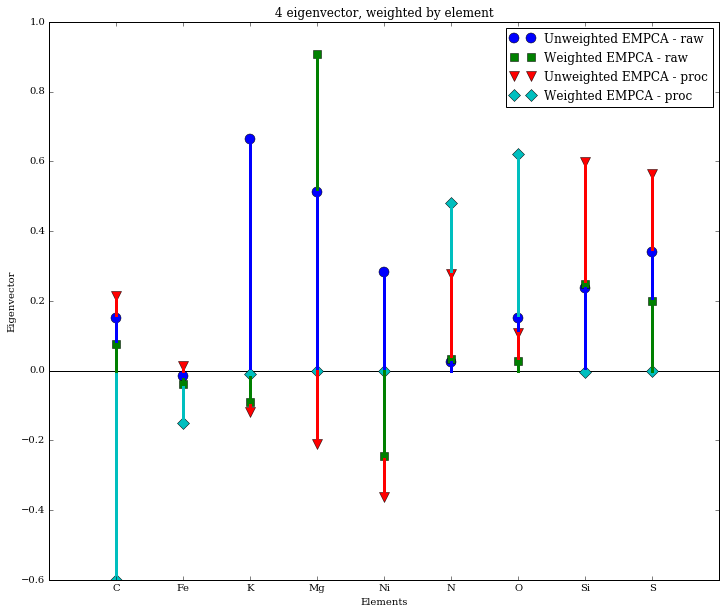

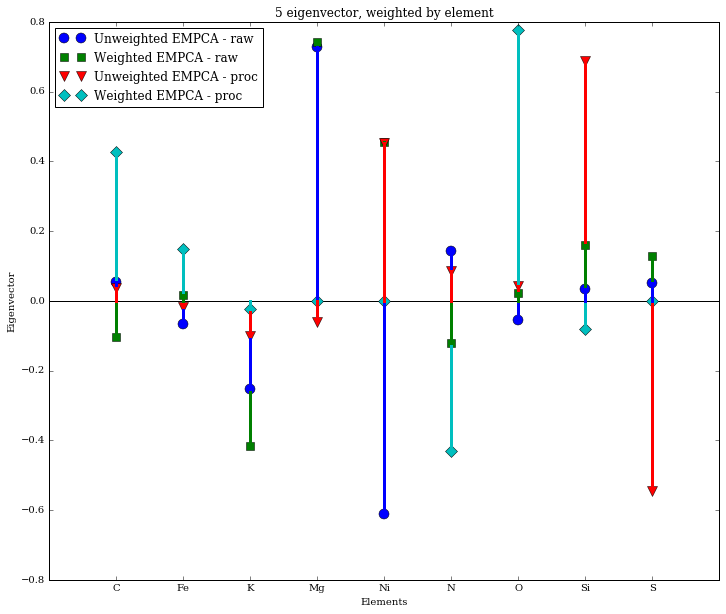

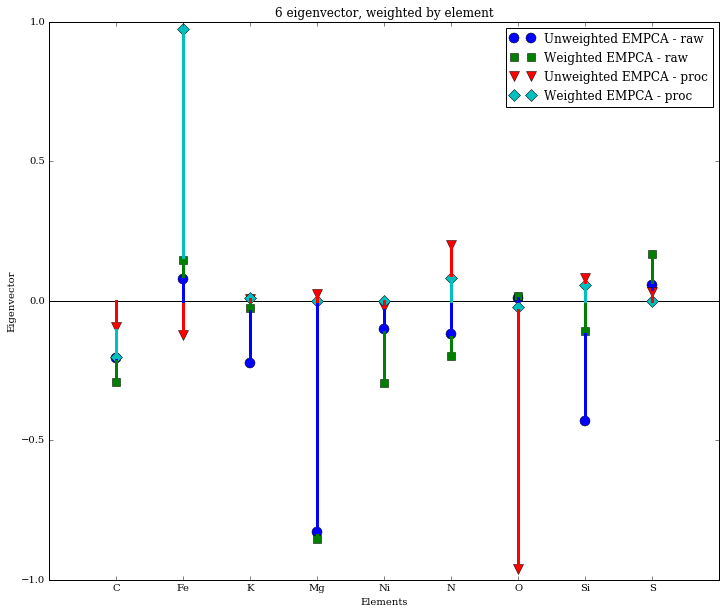

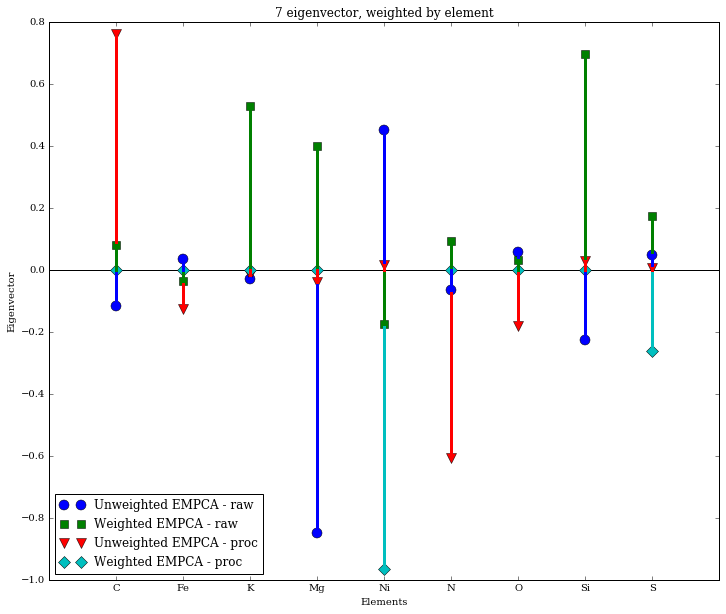

In [104]:
run run_empca -vu -m red_clump/pickles/model_FE_H_u-0.4_d-0.5.pkl -d 2e-3 -n 30

In [31]:
w2, w1

(array([[ 40016.61287364,  39998.64500665,  51604.94275474, ...,
          39746.77881758,  39987.01552389,  39037.17610299],
        [ 42693.19870683,  27555.67939516,  28699.85945868, ...,
          22981.40566009,  27682.43929434,  23720.40114241],
        [ 39997.89044299,  40000.00178814,  39988.2753723 , ...,
          39999.64563576,  39994.44900922,  39738.14750484],
        ..., 
        [ 60749.91053934,      0.        ,  40288.28177852, ...,
          32636.91539599,  35152.38976823,  36175.57982279],
        [ 50692.39225123,      0.        ,  12939.15647099, ...,
           8271.14876744,   9003.28040827,   8279.87779902],
        [ 39973.30757259,  40000.00178814,  45717.35290298, ...,
          39992.79392918,  39977.43321392,  39351.03693048]]),
 array([[ 40000.        ,  39975.3671875 ,  40000.        , ...,
          35213.44921875,  34408.15234375,  33507.16015625],
        [ 14603.73535156,  14111.79101562,  14233.26953125, ...,
           3621.98828125,   3651.8166

In [1]:
hidefigs = False
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


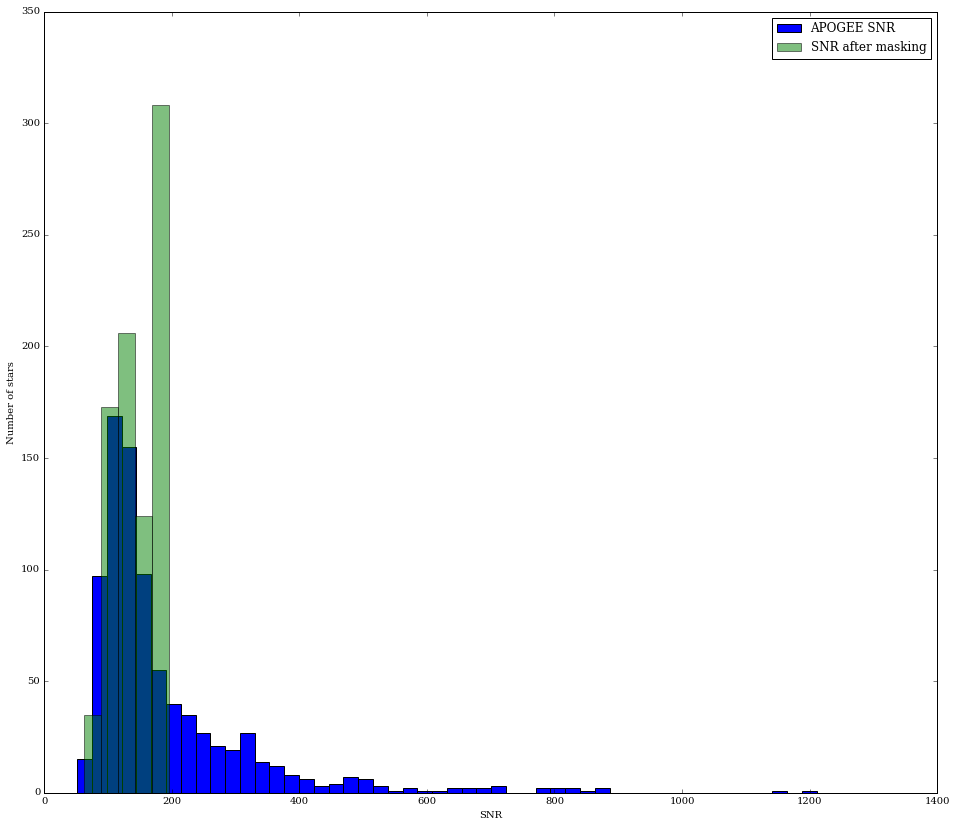

In [4]:
maSNR = np.ma.mean(starsample.specs/starsample.errs,axis=1)
# Plot SNR histogram

SNRhist,SNRbins = np.histogram(starsample.data['SNR'],bins = 50)
maSNRhist,maSNRbins = np.histogram(maSNR,bins=5)
plt.figure(figsize=(16,14))
plt.bar(SNRbins[:-1],SNRhist,width = (SNRbins[1]-SNRbins[0]),label='APOGEE SNR')
plt.bar(maSNRbins[:-1],maSNRhist,width = (maSNRbins[1]-maSNRbins[0]),color='green',alpha=0.5,label='SNR after masking')
plt.xlabel('SNR')
plt.ylabel('Number of stars')
plt.legend(loc = 'best')

In [5]:
import empca
reload(empca)
from empca import empca

In [16]:
mask.shape

(846, 0)

In [18]:
# Do EMPCA
nvecs = 30
deltR2 = 2e-3
gen = True
empcaname = starsample.outName('pkl',content = 'empca',order = starsample.order,seed = starsample.seed,cross=starsample.cross)
empcaname = empcaname.split('pkl')[0]+'nvec{0}'.format(nvecs)+'.pkl'
if os.path.isfile(empcaname) and not gen:
    empcamodel,empcamodel_weight = acs.pklread(empcaname)
elif not os.path.isfile(empcaname) or gen:
    mask = (starsample.residual.T.mask==False)
    weights = mask.astype(int)
    weights[mask] = 1./np.sqrt(starsample.errs[mask]**2) # Correct?
    empcamodel,runtime1 = timeIt(empca,starsample.residual.T,weights = mask.astype(int),nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime1/60.,' min'
    empcamodel_weight,runtime2 = timeIt(empca,starsample.residual.T,weights = weights,nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime2/60.,' min'
    acs.pklwrite(empcaname,[empcamodel,empcamodel_weight])

       iter        R2             rchi2
EMPCA  1/25       0.04464221      0.00014664
EMPCA  2/25       0.22869774      0.00011824
EMPCA  3/25       0.30428086      0.00010666
EMPCA  4/25       0.33727646      0.00010160
EMPCA  5/25       0.35048938      0.00009957
EMPCA  6/25       0.35677518      0.00009861
EMPCA  7/25       0.36030962      0.00009807
EMPCA  8/25       0.36260720      0.00009771
EMPCA  9/25       0.36426603      0.00009746
R2: 0.36845006274
Runtime: 7.13773883184  min
       iter        R2             rchi2
EMPCA  1/25       0.04318815      0.01884293
EMPCA  2/25       0.22158027      0.01504206
EMPCA  3/25       0.30875850      0.01321045
EMPCA  4/25       0.33944906      0.01255509
EMPCA  5/25       0.34924585      0.01234620
EMPCA  6/25       0.35295678      0.01226780
EMPCA  7/25       0.35537880      0.01221703
EMPCA  8/25       0.35768070      0.01216927
EMPCA  9/25       0.35950644      0.01213161
R2: 0.364459235003
Runtime: 7.08335200151  min


In [7]:
Vnoise = (1./(starsample.numstars*aspcappix))*np.ma.sum(np.ma.sum(starsample.errs**2,axis=1))
R2noise = 1-Vnoise/(empcamodel._unmasked_data_mad2*1.4826**2.)
R2 = np.zeros(nvecs)
R2_w = np.zeros(nvecs)
for vec in range(nvecs):
    R2[vec] = empcamodel.R2(vec)
    R2_w[vec] = empcamodel_weight.R2(vec)

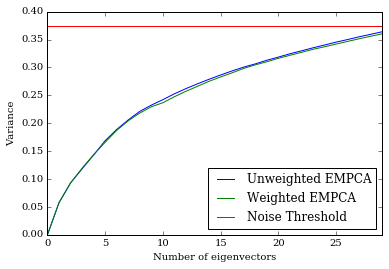

In [8]:
hidefigs=False
plt.figure(1)
plt.plot(range(nvecs),R2,label='Unweighted EMPCA')
plt.plot(range(nvecs),R2_w,label='Weighted EMPCA')
plt.axhline(R2noise,color='red',label='Noise Threshold')
plt.xlabel('Number of eigenvectors')
plt.ylabel('Variance')
plt.legend(loc='best')
plt.xlim(0,nvecs-1)
#plt.savefig('./{0}/empca/empcaR2_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}_nvec{7}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low,nvecs))
if hidefigs:
    plt.close()

In [46]:
neweigvecs = np.zeros((nvecs,len(elems)))
neweigvecs_w = np.zeros((nvecs,len(elems)))
for ind in range(len(elems)):
    for vec in range(nvecs):
        neweigvecs[vec][ind] = starsample.weighting(empcamodel.eigvec[vec],elems[ind])
        neweigvecs_w[vec][ind] = starsample.weighting(empcamodel_weight.eigvec[vec],elems[ind])

In [47]:
# Create weighted residuals
weighted = np.ma.masked_array(np.zeros((len(elems),len(starsample.specs))))
weightedsigs = np.ma.masked_array(np.zeros((len(elems),len(starsample.specs))))
i=0
for elem in elems:
    weightedr = starsample.weighting_stars(starsample.residual,elem,
                                           starsample.outName('pkl','resids',elem=elem,
                                                              order = starsample.order,cross=starsample.cross))
    weighteds = starsample.weighting_stars(starsample.sigma.T,elem,
                                           starsample.outName('pkl','sigma',elem=elem,
                                                              order = starsample.order,seed = starsample.seed))
    doubleResidualHistPlot(elem,weightedr,weighteds,
                           starsample.outName('res','residhist',elem = elem,order = starsample.order,
                                              cross=starsample.cross,seed = starsample.seed),
                           bins = 50)
    weighted[i] = weightedr
    weightedsigs[i] = weighteds
    i+=1

In [71]:
# Do EMPCA on weighted residuals
nvecs = 5
deltR2 = 2e-5
empcaname = starsample.outName('pkl',content = 'empca_element',order = starsample.order,
                               seed = starsample.seed,cross=starsample.cross)
empcaname = empcaname.split('.pkl')[0]+'nvec{0}'.format(nvecs)+'.pkl'
if os.path.isfile(empcaname):
    wempcamodel,wempcamodel_weight = acs.pklread(empcaname)
elif not os.path.isfile(empcaname):
    mask = (weighted.T.mask==False)
    weights = 1./np.sqrt(weightedsigs.T**2) # Correct?
    wempcamodel,runtime1 = timeIt(empca,weighted.T,weights = mask.astype(int),nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime1/60.,' min'
    wempcamodel_weight,runtime2 = timeIt(empca,weighted.T,weights = weights,nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime2/60.,' min'
    acs.pklwrite(empcaname,[wempcamodel,wempcamodel_weight])

/Users/Natalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide

       iter        R2             rchi2
EMPCA  1/25       0.42568222      0.00004626
EMPCA  2/25       0.60131044      0.00003206
EMPCA  3/25       0.66824695      0.00002667
EMPCA  4/25       0.70953090      0.00002335
EMPCA  5/25       0.70073375      0.00002406
EMPCA  6/25       0.70782277      0.00002349
EMPCA  7/25       0.73021780      0.00002169
EMPCA  8/25       0.74075683      0.00002085
EMPCA  9/25       0.74403236      0.00002058
EMPCA 10/25       0.74514853      0.00002049
EMPCA 11/25       0.74565129      0.00002045
EMPCA 12/25       0.74594327      0.00002043
EMPCA 13/25       0.74613913      0.00002041
EMPCA 14/25       0.74627905      0.00002040
EMPCA 15/25       0.74638140      0.00002039
EMPCA 16/25       0.74645683      0.00002039
EMPCA 17/25       0.74651246      0.00002038
EMPCA 18/25       0.74655342      0.00002038
EMPCA 19/25       

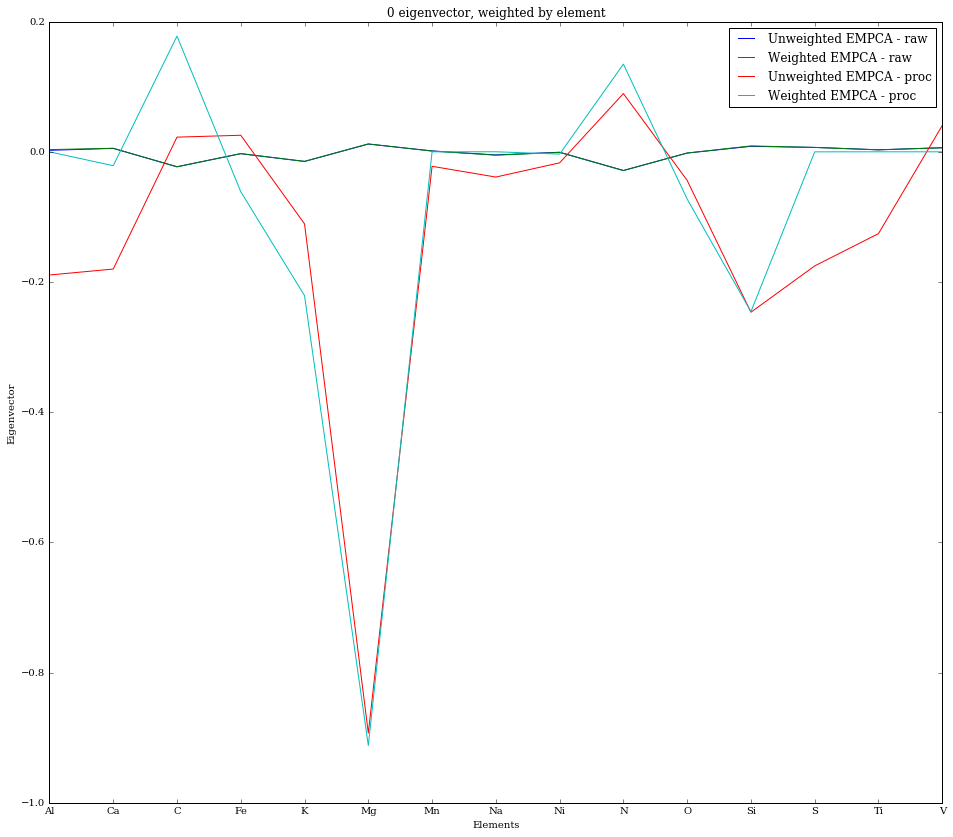

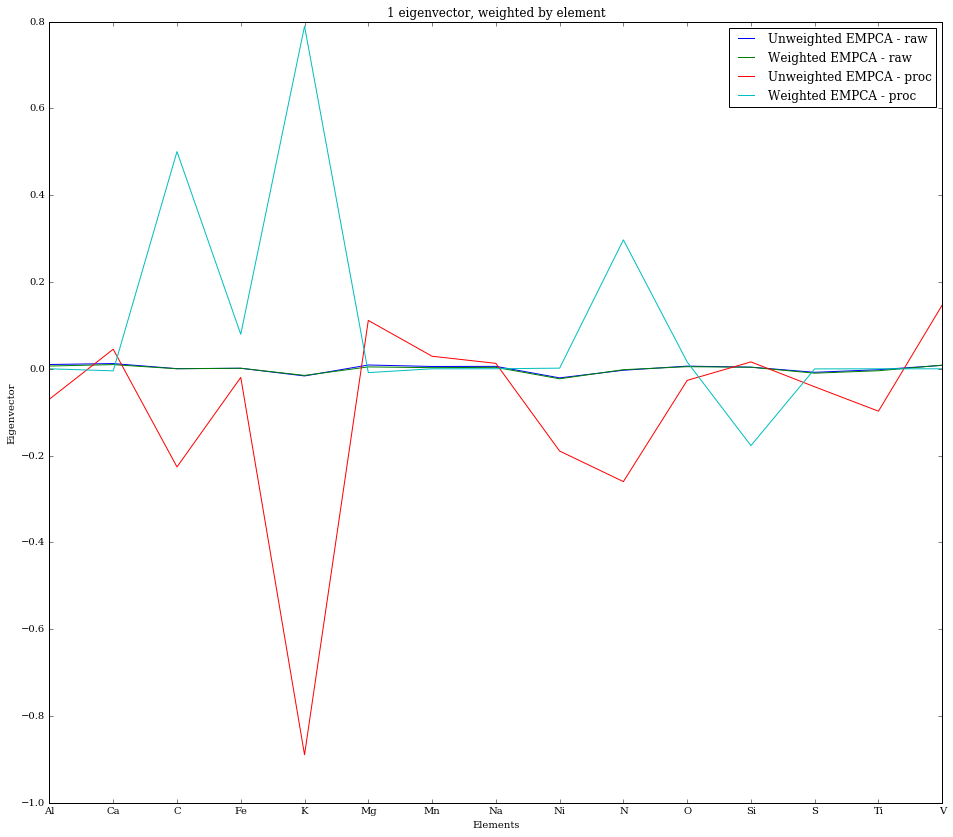

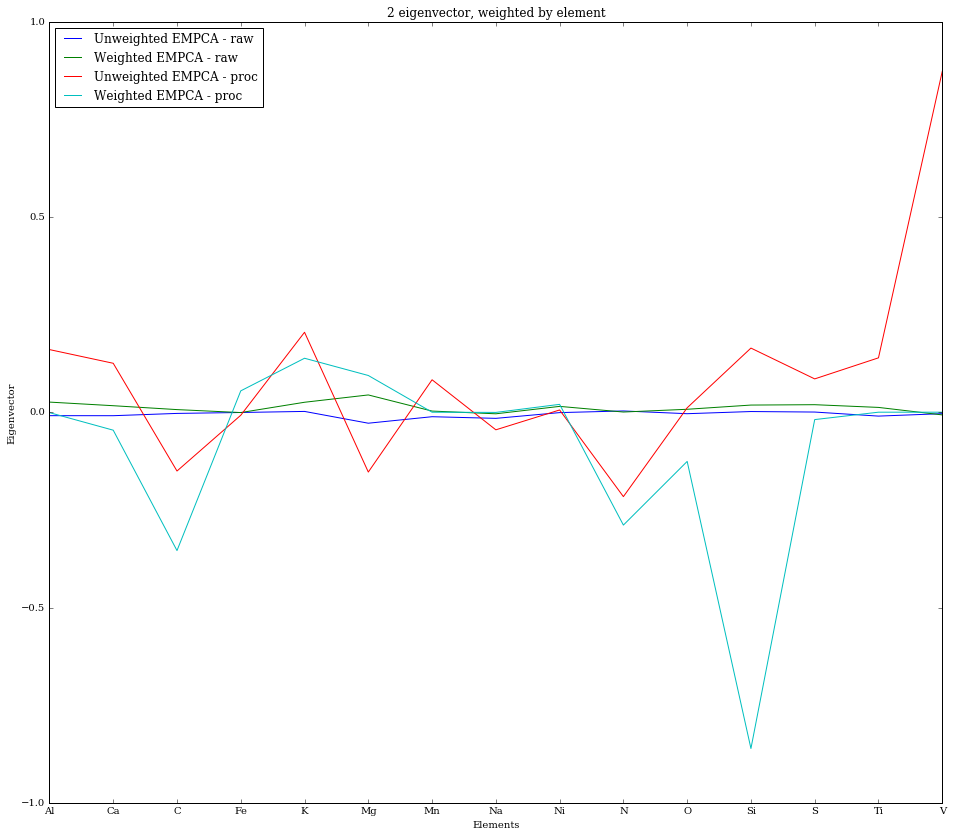

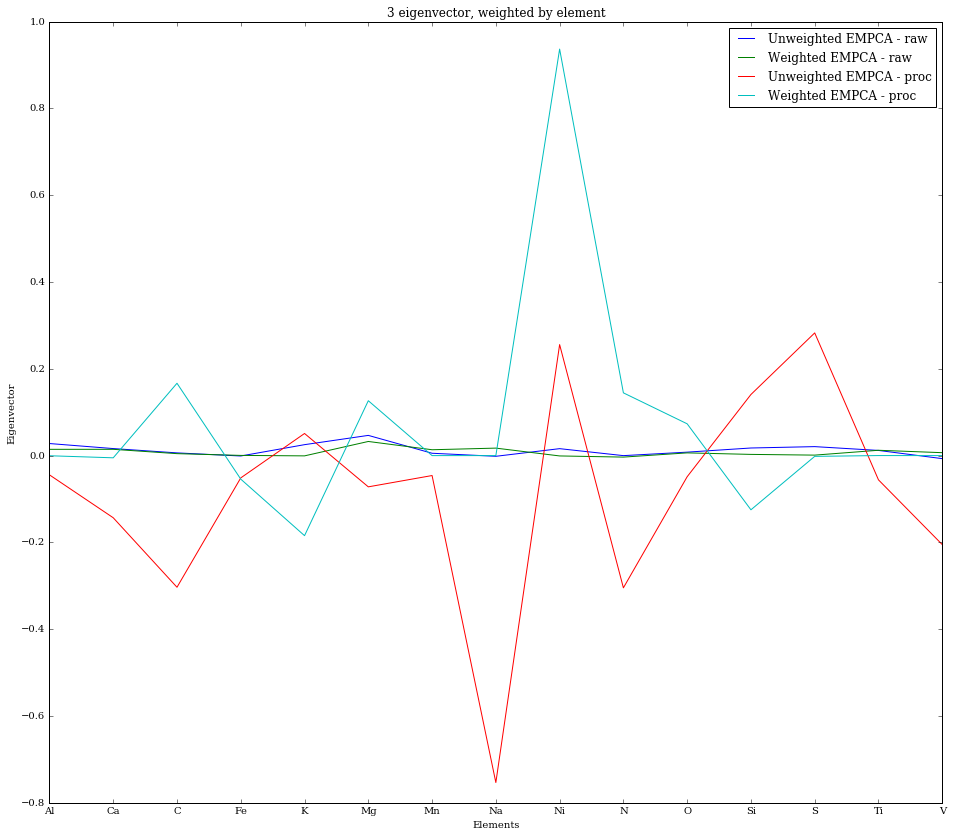

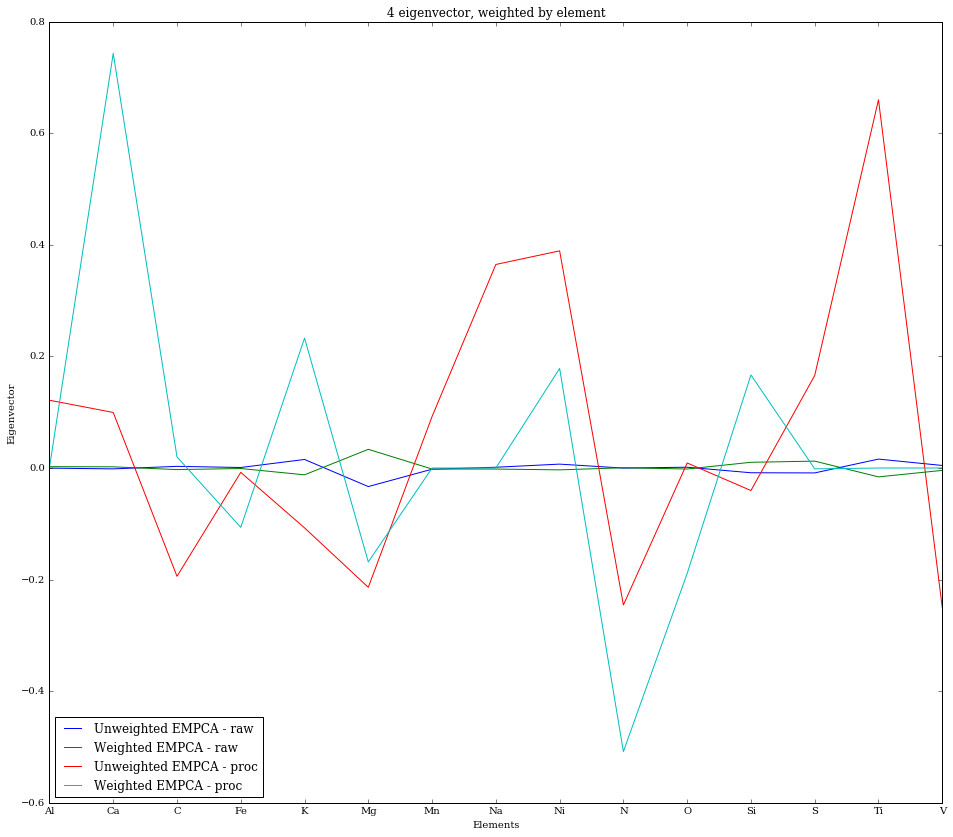

In [76]:
for vec in range(5):
    plt.figure(figsize=(16,14))
    plt.xticks(range(len(elems)),elems)
    plt.plot(neweigvecs[vec],label='Unweighted EMPCA - raw')
    plt.plot(neweigvecs_w[vec],label='Weighted EMPCA - raw')
    plt.plot(wempcamodel.eigvec[vec], label= 'Unweighted EMPCA - proc')
    plt.plot(wempcamodel_weight.eigvec[vec], label= 'Weighted EMPCA - proc')
    plt.legend(loc='best')
    plt.xlabel('Elements')
    plt.ylabel('Eigenvector')
    plt.title('{0} eigenvector, weighted by element'.format(vec))
    plt.savefig('./{0}/empca/eig{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}_nvec{8}.png'.format(starsample.type,vec, starsample.order,starsample.seed,starsample.cross,label,up,low,nvecs))
    if hidefigs:
        plt.close()

In [ ]:
plt.figure()
allmasksplot = np.copy(starsample.mask.astype(np.float64))
allmasksplot[np.where(starsample.mask==0)] = np.nan
plt.imshow(allmasksplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_mask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
allbitmasksplot = np.copy(starsample.bitmask).astype(np.float64)
allbitmasksplot[np.where(starsample.bitmask==0)] = np.nan
plt.imshow(np.log2(allbitmasksplot),aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_bitmask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
SNRplot = starsample.specs/starsample.errs
SNRplot[np.where(SNRplot.mask!=0)] = np.nan
plt.imshow(SNRplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_SNR_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

In [73]:
residcov = np.ma.cov(starsample.residual)
normresidcov = np.ma.cov(starsample.residual/starsample.errs.T)

In [74]:
rcovlim = 1e-4
nrcovlim = 4

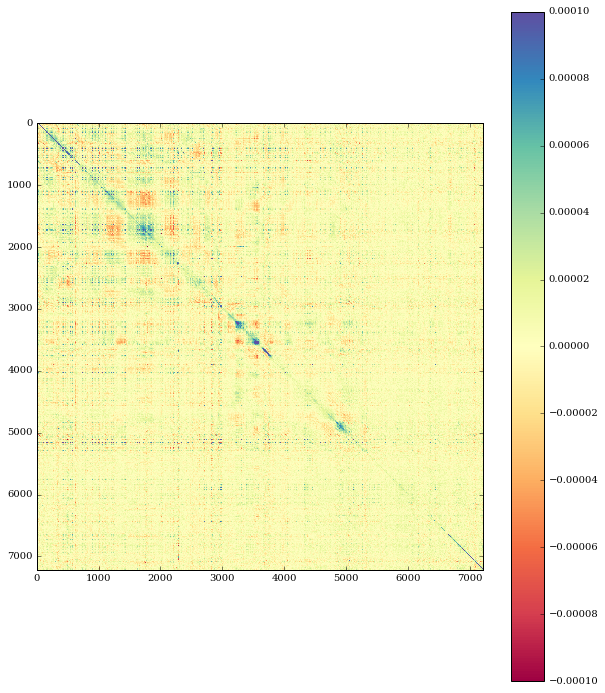

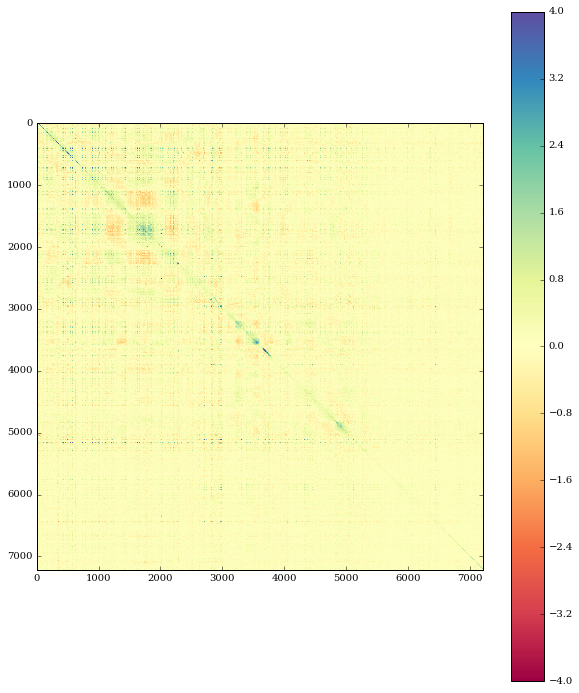

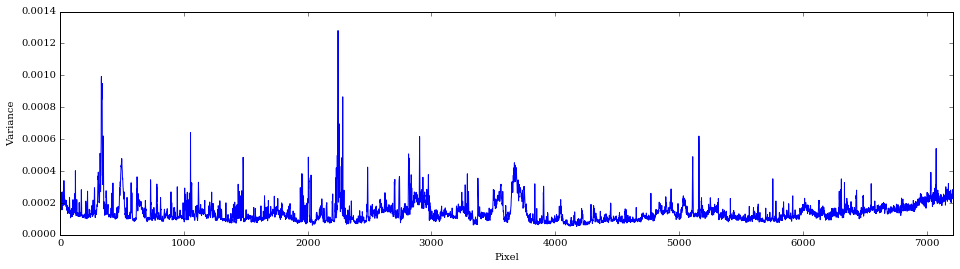

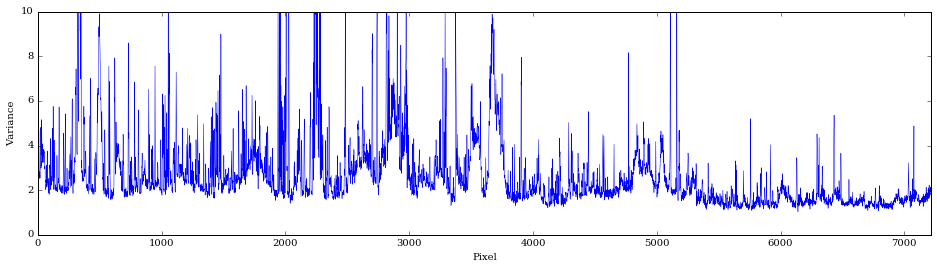

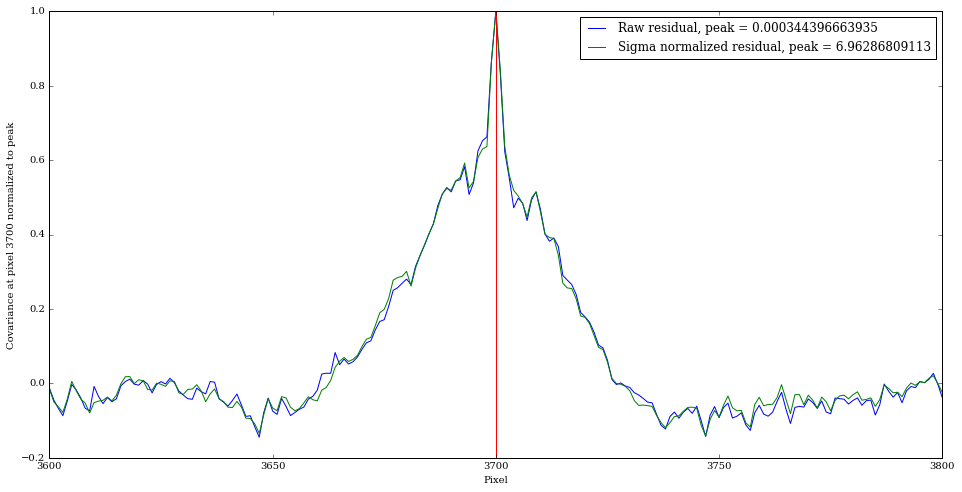

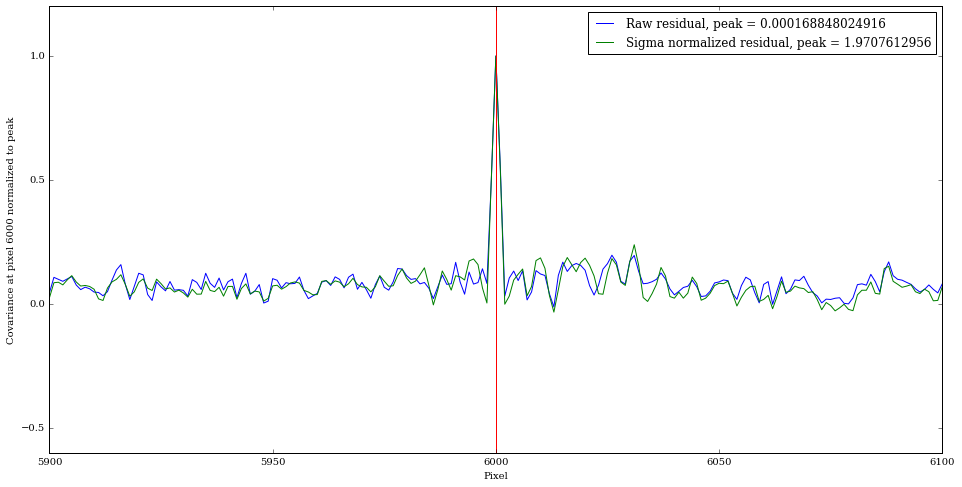

In [75]:
# Plot covariance of raw pixel residuals
plt.figure(figsize=(10,12))
plt.imshow(residcov,interpolation='nearest',cmap = 'Spectral',vmax=rcovlim,vmin=-rcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(10,12))
plt.imshow(normresidcov,interpolation='nearest',cmap = 'Spectral',vmax=nrcovlim,vmin=-nrcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/norm_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of covariance of raw pixel residuals
plt.figure(figsize=(16,4))
diag = np.array([residcov[i,i] for i in range(len(residcov))])
plt.plot(diag)
plt.xlim(0,len(diag))
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of  covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(16,4))
normdiag = np.array([normresidcov[i,i] for i in range(len(normresidcov))])
plt.plot(normdiag,linewidth = 0.5)
plt.xlim(0,len(normdiag))
plt.ylim(0,10)
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/norm_diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot two slices of the covariance matrices
samppix = 3700
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

samppix = 6000
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()